In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [2]:
def find_edge_coordinates(array):
    edges = cv2.Canny(array, 10, 255)
    indices = np.where(edges != [0])
    data = pd.DataFrame()
    data['X'], data['Y'] = indices[0], indices[1]
    
    return edges, data

In [3]:
def Area(x, y):
    s = 0
    for i in range(len(x) - 1):
        s += x[i]*y[i+1] - x[i+1]*y[i]
    return np.abs(s/2)

354 356
101022.5
100659.77021367056
0.3603522892606155


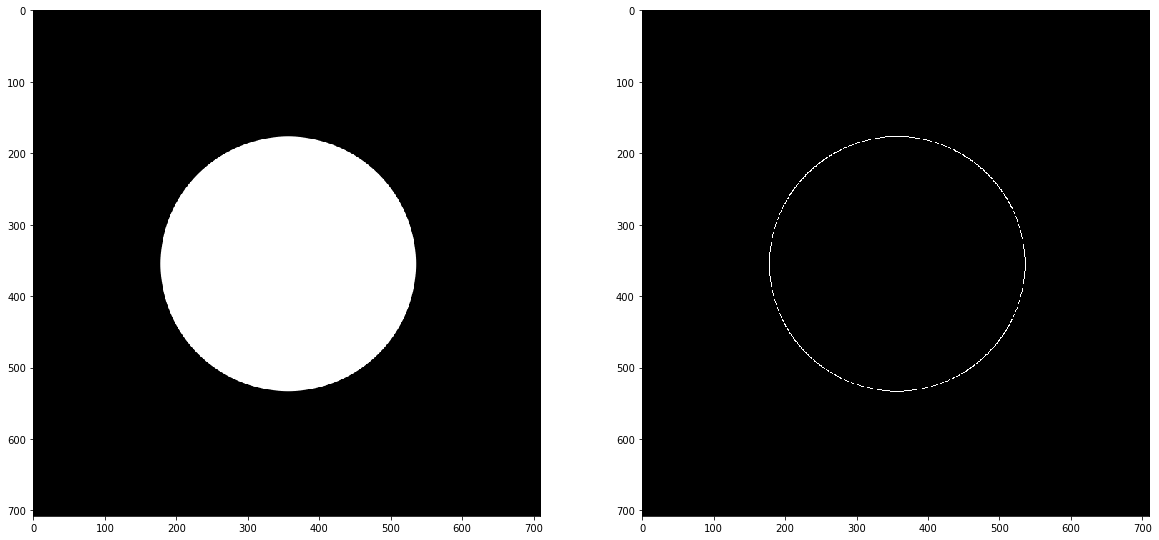

In [5]:
circle = cv2.imread('circle.png', 0)

circle_edge, circle_edge_indices = find_edge_coordinates(circle)
center_circle_x = int(circle_edge_indices['X'].median())
center_circle_y = int(circle_edge_indices['Y'].median())
print(center_circle_x, center_circle_y)

radius = np.count_nonzero(circle[center_circle_x])/2

area_analytical_circle = np.pi * radius**2

circle_edge_indices['X'] = circle_edge_indices['X'] - center_circle_x
circle_edge_indices['Y'] = circle_edge_indices['Y'] - center_circle_y
circle_edge_indices['r'] = np.sqrt(circle_edge_indices['X']**2 + circle_edge_indices['Y']**2)
circle_edge_indices['theta'] = np.arctan2(circle_edge_indices['Y'], circle_edge_indices['X'])
circle_edge_indices = circle_edge_indices.sort_values('theta',ascending=True)

indices_x = np.array(circle_edge_indices['X'].tolist())
indices_y = np.array(circle_edge_indices['Y'].tolist())

area = Area(indices_x, indices_y) + len(indices_x)
print(area)
print(area_analytical_circle)

percent_error = np.abs((area - area_analytical_circle) / area_analytical_circle) * 100
print(percent_error)

plt.figure(figsize=[20,20])
plt.subplot(121)
plt.imshow(circle, cmap = 'gray')
plt.subplot(122)
plt.imshow(circle_edge, cmap='gray')
plt.show()

354 356
89319.0
88804
0.579928832034593


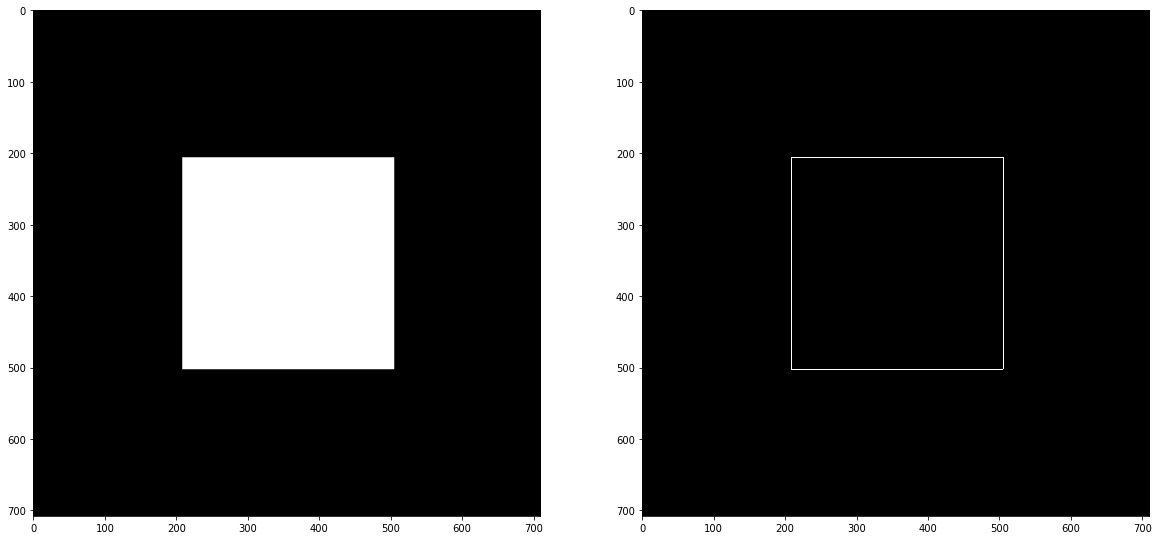

In [6]:
square = cv2.imread('square.png', 0)
square_edge, square_edge_indices = find_edge_coordinates(square)
square_circle_x = int(square_edge_indices['X'].median())
square_circle_y = int(square_edge_indices['Y'].median())

print(square_circle_x, square_circle_y)

side = np.count_nonzero(square[square_circle_x])

area_analytical_square = side**2

square_edge_indices['X'] = square_edge_indices['X'] - square_circle_x
square_edge_indices['Y'] = square_edge_indices['Y'] - square_circle_y
square_edge_indices['r'] = np.sqrt(square_edge_indices['X']**2 + square_edge_indices['Y']**2)
square_edge_indices['theta'] = np.arctan2(square_edge_indices['Y'], square_edge_indices['X'])
square_edge_indices = square_edge_indices.sort_values('theta',ascending=True)

indices_x = np.array(square_edge_indices['X'].tolist())
indices_y = np.array(square_edge_indices['Y'].tolist())

area = Area(indices_x, indices_y) + len(indices_x)
print(area)
print(area_analytical_square)

percent_error = np.abs((area - area_analytical_square) / area_analytical_square) * 100
print(percent_error)


plt.figure(figsize=[20,20])
plt.subplot(121)
plt.imshow(square, cmap = 'gray')
plt.subplot(122)
plt.imshow(square_edge, cmap='gray')
plt.show()

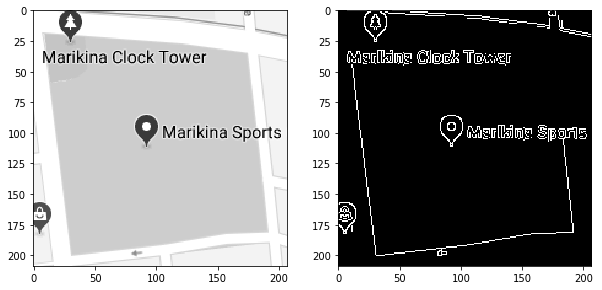

In [24]:
court = cv2.imread('center.png', 0)

edges = cv2.Canny(court, 0, 255)
indices = np.where(edges != [0])
data = pd.DataFrame()
data['X'], data['Y'] = indices[0], indices[1]

#court_edge, court_edge_indices = find_edge_coordinates(court)

plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(court, cmap = 'gray')
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.show()

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


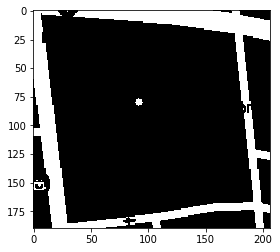

In [63]:
img = cv2.imread('center.png', 0)
ret, Binary_image = cv2.threshold(img,254,255,cv2.THRESH_BINARY)
Binary_image = Binary_image[0:205][15:210]

print(Binary_image)
plt.imshow(Binary_image, cmap=plt.get_cmap('gray'))
#plt.axis('off')
plt.show()

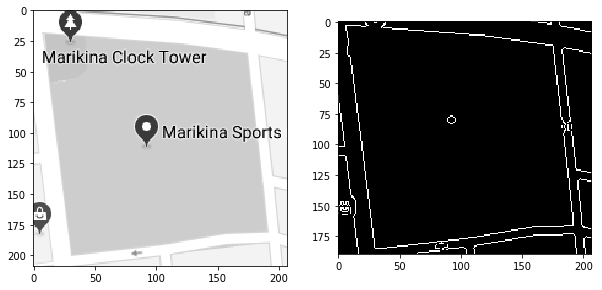

In [64]:
edges = cv2.Canny(Binary_image, 0, 255)
indices = np.where(edges != [0])
data = pd.DataFrame()
data['X'], data['Y'] = indices[0], indices[1]

#court_edge, court_edge_indices = find_edge_coordinates(court)

plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(court, cmap = 'gray')
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.show()

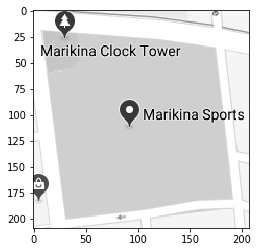

In [66]:
import cv2

court = cv2.imread('center.png')
court = cv2.cvtColor(court, cv2.COLOR_BGR2GRAY)

plt.imshow(court, 'gray')

In [ ]:
ret,thresh1 = cv2.threshold(court,20,255,cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresh1, kernel,iterations = 1)

opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #find contours with simple approximation

cv2.imshow('cleaner', closing)
cv2.drawContours(closing, contours, -1, (255, 255, 255), 4)
cv2.waitKey(0)